In [1]:
import pandas as pd
import json
import numpy as np
import requests 
import matplotlib.pyplot as plt
from requests.auth import HTTPBasicAuth

### 1. The dataset is highly skewed toward the cities included in Delhi-NCR. So, we will summarise all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR. Doing this would make our analysis turn toward Delhi-NCR v Rest of India.

    1. Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

    2. Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.

    3. Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

    4. Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.

In [2]:
df = pd.read_csv('datasets/zomato.csv')

In [3]:
dfa = df.copy()
dfa = dfa[dfa['Country Code'] == 1] # because we have to consider restaurants situated in india only

dncr =[ 'New Delhi', 'Ghaziabad', 'Noida', 'Gurgaon', 'Faridabad' ]

# replacing the name of cities 'New Delhi', 'Ghaziabad', 'Noida', 'Gurgaon', 'Faridabad' to Delhi NCR
for i in dncr :
    dfa.City.replace(i, "Delhi NCR", inplace = True) 

# replacing all the other cities to Rest of India
for i in dfa.City :
    if i != 'Delhi NCR' : 
        dfa.City.replace(i, "Rest of India", inplace = True)

### 1.1 Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

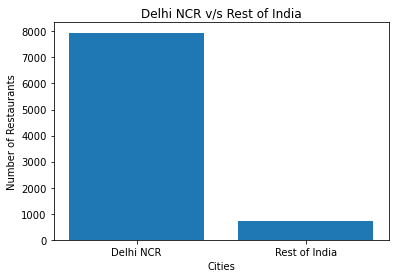

Delhi NCR 7947
Rest of India 705


In [4]:
x = dfa.City.value_counts().index
y = dfa.City.value_counts().values

plt.bar(x, y)
plt.title('Delhi NCR v/s Rest of India')
plt.ylabel('Number of Restaurants')
plt.xlabel('Cities')
plt.show()

for i in range(len(x)) :
    print(x[i], y[i])

### 1.2  Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.

In [5]:
dncr_cuisines = set() # set of cuisines available in delhi NCR as per dataset
roi_cuisines = set() # set of cuisines available in rest of india as per dataset
dncr_df = dfa[dfa.City == 'Delhi NCR'] # dataset of only cities in dncr
roi_df = dfa[dfa.City == 'Rest of India'] # dataset of all cities other than dncr

for i in dncr_df.Cuisines :
    a = i.split(',')
    for j in a :
        dncr_cuisines.add(j.strip())

for i in roi_df.Cuisines :
    a = i.split(',')
    for j in a :
        roi_cuisines.add(j.strip())
        
ans = roi_cuisines.difference(dncr_cuisines) #set of cuisines available in rest of india but not in delhi NCR
print(ans)

{'German', 'BBQ', 'Malwani', 'Cajun'}


In [6]:
#checking using Zomato API
res = requests.get('https://developers.zomato.com/api/v2.1/cuisines', headers = {'user_key' :'399720f6f904f106e162cd2bd0011a6f' }, 
                   params = {'city_id' : 1}) # 1 is the city_id of Delhi NCR

data = res.json()

dncr_api = set() # set of cuisines available in delhi NCR as per zomato api
for i in data['cuisines'] :
    dncr_api.add(i['cuisine']['cuisine_name'])

ans.intersection_update(dncr_api)

print(ans)

{'BBQ'}


"ans" is the set of cuisines available in rest of india and not in delhi NCR, 

"dncr_api" is the set of all the cuisines available in Delhi NCR as per zomato API

From set ans = {'German', 'BBQ', 'Malwani', 'Cajun'} ,BBQ is present in set dncr_api
which implies that BBQ is served in delhi NCR, hence dataset is incomplete

### 1.3  Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

In [7]:
dncr_df = dfa[dfa.City == 'Delhi NCR'] # dataset of only cities in dncr
roi_df = dfa[dfa.City == 'Rest of India'] # dataset of all cities other than dncr

dncr_cuisines = {}
roi_cuisines = {}

for i in dncr_df.Cuisines :
    a = i.split(',')
    for j in a :
        dncr_cuisines[j.strip()] = dncr_cuisines.get(j.strip(), 0) + 1

dncr_list = []
for i in dncr_cuisines:
    dncr_list.append([dncr_cuisines[i], i])
dncr_list.sort(reverse = True)

#printing top 10 cuisines in dncr
print('Top 10 Cuisines in NCR : ')
for i in range(10) :
    print(dncr_list[i][0], dncr_list[i][1])


for i in roi_df.Cuisines :
    a = i.split(',')
    for j in a :
        roi_cuisines[j.strip()] = roi_cuisines.get(j.strip(), 0) + 1

roi_list = []
for i in roi_cuisines:
    roi_list.append([roi_cuisines[i], i])
roi_list.sort(reverse = True)

#printing top 10 cuisines in rest of india
print(), print('Top 10 Cuisines in Rest of India : ')
for i in range(10) :
    print(roi_list[i][0], roi_list[i][1])

Top 10 Cuisines in NCR : 
3597 North Indian
2448 Chinese
1866 Fast Food
933 Mughlai
697 Bakery
569 South Indian
547 Continental
542 Desserts
538 Street Food
535 Italian

Top 10 Cuisines in Rest of India : 
349 North Indian
242 Chinese
177 Continental
147 Italian
136 Cafe
97 Fast Food
62 South Indian
59 Mughlai
55 Desserts
50 Mexican


### 1.4  Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.

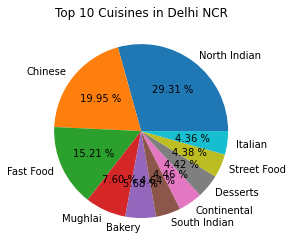

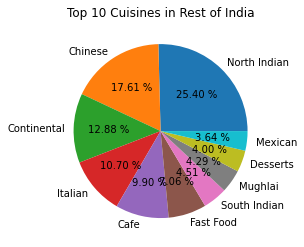

In [8]:
dncr_np = np.array(dncr_list[:10])
roi_np = np.array(roi_list[:10])

plt.pie(dncr_np[:, 0], labels = dncr_np[:, 1], autopct = "%.2f %%")
plt.title('Top 10 Cuisines in Delhi NCR')
plt.show()

plt.pie(roi_np[:, 0], labels = roi_np[:, 1], autopct = "%.2f %%")
plt.title('Top 10 Cuisines in Rest of India')
plt.show()

#### Inference: 
    1. North Indian and Chinese are the top most popular served cuisines in both DNCR and Rest of India
    2. Fast food and Mughlai are the next most popular cuisines served in dncr while in the rest of india, 
    conitental and italian are the most popular served cuisines after north indian and chinese
    3. Also Delhi ncr has more number of restaurants registered at zomato as compared to rest of india,
    this can be confirmed from the first plot 
    
    

### 2. User Rating of a restaurant plays a crucial role in selecting a restaurant or ordering the food from the restaurant.

    1. Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.
        1. Number of Votes given Restaurant
        2. Restaurant serving more number of cuisines.
        3. Average Cost of Restaurant
        4. Restaurant serving some specific cuisines.

    2. Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating?
        1. Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) .

### 2.1.1 Number of Votes given Restaurant

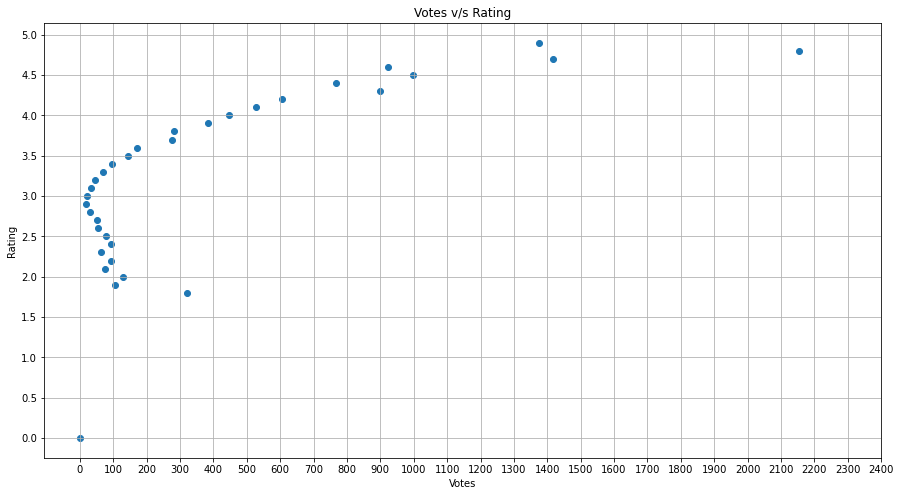

In [9]:
dfb = df.copy()
dfb = dfb[dfb['Country Code'] == 1]

dfb.dropna(subset = ['Votes', 'Aggregate rating'], inplace = True) # dropping all the null values

dfc = dfb.groupby('Aggregate rating')['Votes'].mean()

#graph between rating and average votes on that rating
y = dfc.index
x = dfc.values

xt = np.arange(0, 2500, 100)
yt = np.arange(0, 5.5, 0.5)

plt.figure(figsize=(15, 8))
plt.scatter(x, y)
plt.grid()
plt.xticks(xt)
plt.yticks(yt)
plt.title('Votes v/s Rating')
plt.xlabel('Votes')
plt.ylabel('Rating')

plt.show()

### Inference :
    1. above 3, rating is increasing linearly with the number of votes, hence we can say that rating is somewhat directly proportional to the votes
    2. above 900 votes , rating is more than 4.5
    3. between 0 to 200 votes , there is maximum range of ratings which is between 2 to 3.5
    4. highest rating is at around 1380 votes
hence we can conclude that if the restaurant has recieved more votes then it is likely to have better rating

### 2.1.2 Restaurant serving more number of cuisines.

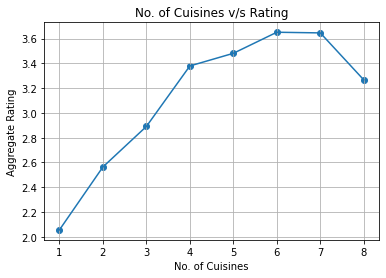

In [11]:
#no. of cuisines
dfb = df.copy()
dfb = dfb[dfb['Country Code'] == 1]

dfb.Cuisines.replace('', np.nan, inplace = True)
dfb['Aggregate rating'].replace('', np.nan, inplace = True)

dfb.dropna(subset = ['Cuisines', 'Aggregate rating'], inplace = True)

cuisines = np.array(dfb.Cuisines.str.split(','))
aggRating = np.array(dfb['Aggregate rating'])

noc = []
for i in cuisines :
    noc.append(len(i))

dfc = pd.DataFrame({'NoC': noc, 'rating': aggRating})

dfc = dfc.groupby('NoC')['rating'].mean()

#graph between aggregate rating and No. of Cuisines
x = dfc.index
y = dfc.values

plt.scatter(x, y)
plt.plot(x, y)
plt.grid()

plt.title('No. of Cuisines v/s Rating')
plt.xlabel('No. of Cuisines')
plt.ylabel('Aggregate Rating')

plt.show()

### Inference :
    1. Rating seems to increase linearly with increase in number of cuisines till 6
    2. For number of cuisines equal to 6 and 7, restaurants seems to have similar ratings
    3. Rating decreases for restaurants having 8 number of cuisines

### 2.1.3 Average Cost of Restaurant

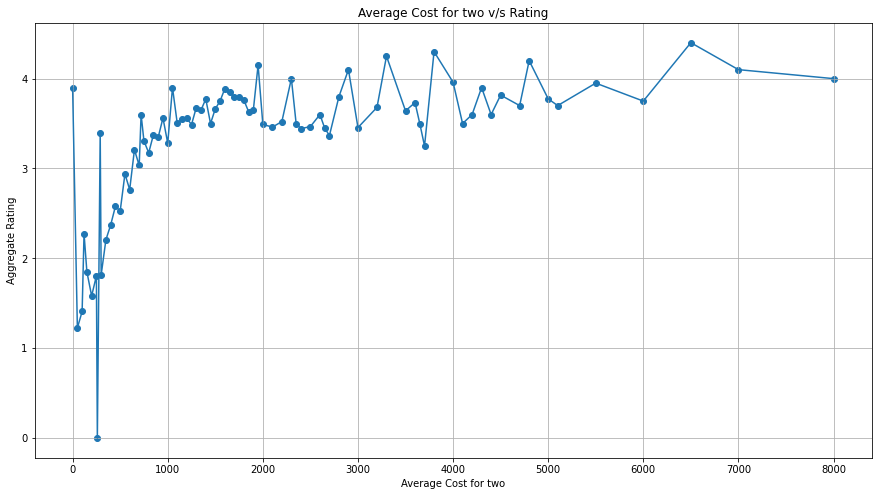

In [12]:
dfb = df.copy()
dfb = dfb[dfb['Country Code'] == 1]

dfb["Average Cost for two"].replace("", np.nan, inplace = True)
dfb['Aggregate rating'].replace('', np.nan, inplace = True)

dfb.dropna(subset = ['Average Cost for two', 'Aggregate rating'], inplace = True)

dfc = dfb.groupby('Average Cost for two')['Aggregate rating'].mean()

#graph between Average Cost for two and aggregate rating
x = dfc.index
y = dfc.values

plt.figure(figsize=(15, 8))
plt.scatter(x, y)
plt.plot(x, y)

plt.grid()

plt.title('Average Cost for two v/s Rating')
plt.xlabel('Average Cost for two')
plt.ylabel('Aggregate Rating')

plt.show()

### Inference :
    1. Rating increases drastically when cost increases from 0 to 1000
    2. For cost greater than 6000, rating is more than 4
    3. Rating is 4 for maximum cost which is 8000
    4. For cost between 1000 to 6000, maximum number of ratings is between 3 and 4
    5. highest rating is at cost 6500

### 2.1.4 Restaurant serving some specific cuisines.

In [13]:
dfb = df.copy()
dfb = dfb[dfb['Country Code'] == 1]

dfb["Cuisines"].replace("", np.nan, inplace = True)
dfb['Aggregate rating'].replace('', np.nan, inplace = True)
dfb.dropna(subset = ['Cuisines', 'Aggregate rating'], inplace = True)

cuisine = np.array(dfb.Cuisines.str.split(','))
rating = np.array(dfb['Aggregate rating'])

noc = []
for i in range(len(cuisine)) :
    for j in cuisine[i] :
        noc.append([j.strip(), rating[i]])
noc = np.array(noc)


dfc = pd.DataFrame({'cuisine': noc[:, 0], 'rating': noc[:, 1]})
dfc.rating = pd.to_numeric(dfc.rating)
dfc = dfc.groupby('cuisine')['rating'].mean()

freq = []
for i in dfc.index :
    freq.append([float(format(dfc[i], '.2f')), i])
freq.sort()

Top 10 Rated Cuisines
Persian 4.6
German 4.35
Modern Indian 4.28
Charcoal Grill 4.18
Parsi 4.1
Iranian 4.07
Steak 4.05
Burmese 4.05
Spanish 4.03
Sri Lankan 4.0


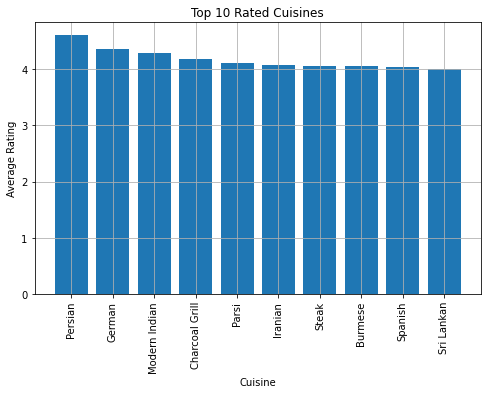

In [14]:
x = []
y = []
print('Top 10 Rated Cuisines')
for i in freq[:-11:-1] :
    y.append(i[0])
    x.append(i[1])
    print(i[1], i[0])   

plt.figure(figsize=(8,5)) 
plt.bar(x, y)
plt.xticks(rotation = 90)
plt.ylabel('Average Rating')
plt.xlabel('Cuisine')
plt.title('Top 10 Rated Cuisines')
plt.grid()
plt.show()

### Inference : 
    top 10 cuisines served by the restaurants, serving which has resulted in the better rating of the restaurant. These cuisines include Persian, German and Modern Indian at the top 3 spots in the same order. This means that restaurants serving these cuisines has affected the rating in the positive manner. 


Top 10 Lowest Rated Cuisines
Cuisine Varies 0.0
Armenian 1.3
Afghani 1.42
Awadhi 1.57
Moroccan 1.62
Nepalese 1.66
Drinks Only 1.75
North Eastern 1.8
Pakistani 1.9
Mithai 2.07


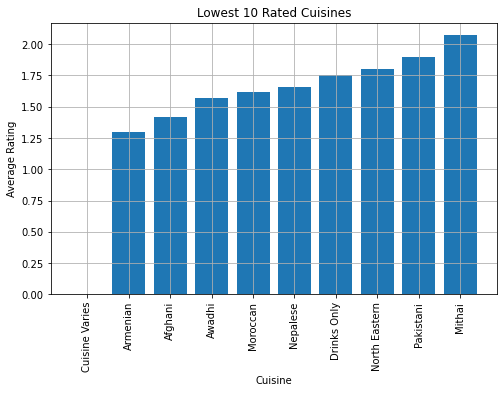

In [15]:
x = []
y = []
print('Top 10 Lowest Rated Cuisines')
for i in freq[0:10] :
    y.append(i[0])
    x.append(i[1])
    print(i[1], i[0])  
    
plt.figure(figsize=(8,5)) 
plt.bar(x, y)
plt.xticks(rotation = 90)
plt.ylabel('Average Rating')
plt.xlabel('Cuisine')
plt.title('Lowest 10 Rated Cuisines')
plt.grid()
plt.show()

### Inference :
    Lowest 10 cuisines served by the restaurants, serving which has resulted in the bad rating of the restaurant. These cuisines include Armenian ,Afghani, awadhi. This means that restaurants serving these cuisines has affected the rating in the negative manner 


### 2.2 Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating?

Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) .

Top 10 localities with more Weighted Restaurant Rating
4.9 Aminabad
4.9 Hotel Clarks Amer, Malviya Nagar
4.89 Friends Colony
4.84 Powai
4.82 Kirlampudi Layout
4.8 Express Avenue Mall,  Royapettah
4.8 Deccan Gymkhana
4.72 Banjara Hills
4.71 Sector 5, Salt Lake
4.7 Riverside Mall, Gomti Nagar


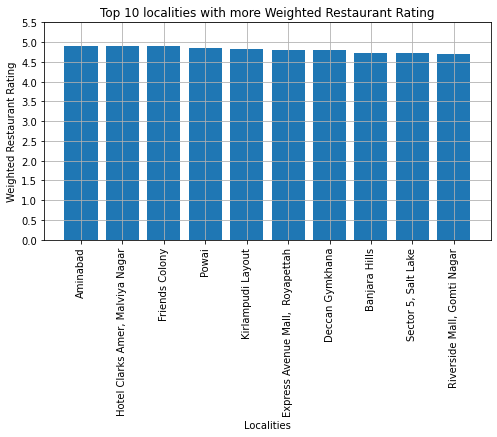

In [22]:
dfb = df.copy()
dfb = dfb[dfb['Country Code'] == 1]

dfb["Votes"].replace("", np.nan, inplace = True)
dfb['Aggregate rating'].replace('', np.nan, inplace = True)
dfb['Locality'].replace('', np.nan, inplace = True)
dfb.dropna(subset = ['Votes', 'Aggregate rating', 'Locality'], inplace = True)

dfc = pd.DataFrame({'Locality' : dfb.Locality, 'Rating' : dfb['Aggregate rating'], 'Votes' : dfb.Votes,
                    'Vote*Rating' : dfb.Votes * dfb['Aggregate rating']})

dfc1 = dfc.groupby('Locality')['Vote*Rating'].sum()
dfc2 = dfc.groupby('Locality')['Votes'].sum()

locality = dfc1.index
votes = np.array(dfc2.values, dtype = float)
votesRating = np.array(dfc1.values, dtype = float)

WeightedRating = dfc1/dfc2

WeightedRating = WeightedRating.sort_values(ascending = False)[:10]

x = WeightedRating.index
y = WeightedRating.values.round(2)

print('Top 10 localities with more Weighted Restaurant Rating')
for i in range(len(x)) :
    print(y[i], x[i])

plt.figure(figsize=(8,4)) 
plt.bar(x, y)
plt.yticks(np.arange(0, 6, 0.5))   
plt.xticks(rotation = 90)
plt.ylabel('Weighted Restaurant Rating')
plt.xlabel('Localities')
plt.title('Top 10 localities with more Weighted Restaurant Rating')
plt.grid()
plt.show()

### Inference :
    The weighted restaurant rating of top ten localities is almost the same. The height of the bars are gradually decreasing. However, Aminabad and Hotel Clarks Amer, Malviya Nagar are the localities where the weighted restaurant rating is the maximum as per the dataset.


## 3. Visualization : 
    1. Plot the bar graph top 15 restaurants have a maximum number of outlets.
    2. Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant).
    3. Plot the bar graph top 10 restaurants in the data with the highest number of votes.
    4. Plot the pie graph of top 10 cuisines present in restaurants in the USA.
    5. Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.

### 3.1 Plot the bar graph top 15 restaurants have a maximum number of outlets.

Restaurants having maximum number of Outlets :
83 Cafe Coffee Day
79 Domino's Pizza
63 Subway
51 Green Chick Chop
48 McDonald's
34 Keventers
29 Pizza Hut
29 Giani
28 Baskin Robbins
25 Barbeque Nation
22 Barista
22 Giani's
22 Dunkin' Donuts
20 Costa Coffee
20 Pind Balluchi


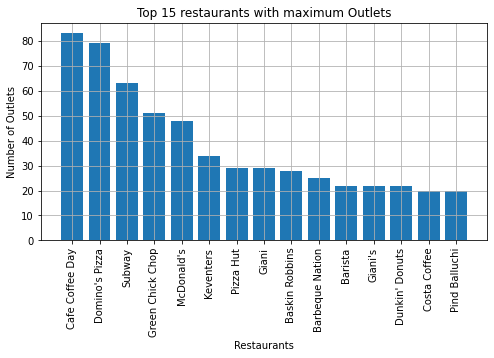

In [24]:
dfc = df.copy()
dfc = dfc[df['Country Code'] == 1]

freq = dfc['Restaurant Name'].value_counts()

x = freq.index[:15]
y = freq.values[:15]

print('Restaurants having maximum number of Outlets :')
for i in range(len(x)) : 
    print(y[i], x[i])

plt.figure(figsize=(8,4)) 
plt.bar(x, y)
plt.xticks(rotation = 90)
plt.ylabel('Number of Outlets')
plt.xlabel('Restaurants')
plt.title('Top 15 restaurants with maximum Outlets')
plt.grid()
plt.show()

### Inference :
    here is a gradual decrease in number of outlets. Cafe Coffee Day and Domino’s Pizza is way ahead of others in terms of number of outlets while Costa Coffee and Pind Balluchi has the lowest number of outlets among the top 15 restaurants.


### 3.2 Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant).

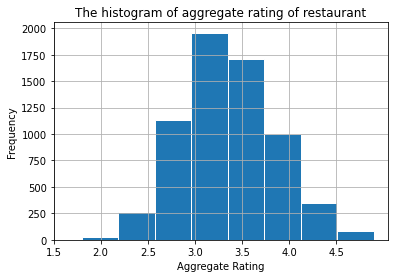

In [18]:
dfc = df.copy()
dfc = dfc[dfc['Country Code'] == 1]
dfc = dfc[dfc['Aggregate rating'] != 0.0]
x = dfc['Aggregate rating']

xt = np.arange(1.5, 5, 0.5)

plt.hist(x, bins = 8, edgecolor = 'white')
plt.xticks(xt)
plt.title('The histogram of aggregate rating of restaurant')
plt.ylabel('Frequency')
plt.xlabel('Aggregate Rating')
plt.grid()
plt.show()

### Inference : 
    This histogram contains 8 bins of ratings ranging from 1.5 to 5. From the graph we infer that most of the restaurants are rated between 2.9 to 3.8. The frequency of restaurants having rating greater than 4.5 is very low, same is the case with the restaurants having lower ratings. 


### 3.3 Plot the bar graph top 10 restaurants in the data with the highest number of votes.

Restaurants with highest number of Votes :
10934 Toit
9667 Truffles
7931 Hauz Khas Social
7574 Peter Cat
6907 AB's - Absolute Barbecues
5966 Barbeque Nation
5705 Big Brewsky
5434 AB's - Absolute Barbecues
5385 The Black Pearl
5288 BarBQ


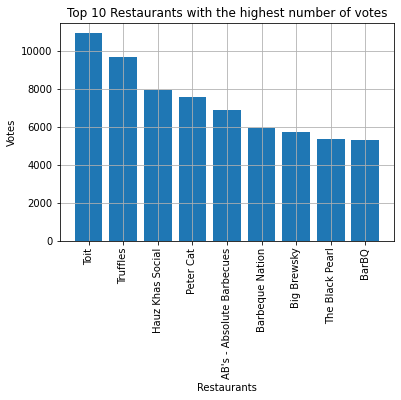

In [29]:
dfc = df.copy()
dfc = dfc[dfc['Country Code'] == 1]

dfc = dfc.sort_values('Votes', ascending = False)[:10]

x = dfc['Restaurant Name']
y = dfc['Votes']

print('Restaurants with highest number of Votes :')

for i in range(len(x)) :
    print(y.values[i], x.values[i])
    
plt.bar(x, y)
plt.xticks(rotation = 90)
plt.ylabel("Votes")
plt.xlabel("Restaurants")
plt.title('Top 10 Restaurants with the highest number of votes')
plt.grid()
plt.show()

### Inference : 
    Toit has received the most number of Votes, while The Black Pearl and BarBQ has received the lowest number of votes out of these top 10 restaurants with most number of votes.


### 3.4 Plot the pie graph of top 10 cuisines present in restaurants in the USA.

Top 10 Cuisines in USA : 
112 American
59 Seafood
49 Burger
49 Sandwich
49 Pizza
42 Steak
38 Italian
37 Breakfast
36 Mexican
34 Sushi


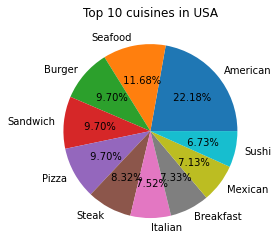

In [20]:
dfc = df.copy()
dfc = dfc[dfc['Country Code'] == 216]
dfc = dfc[dfc['Cuisines'] != '']
dfc.dropna(subset = ['Cuisines'], inplace = True)

cuisines = dfc.Cuisines.str.split(',')

cuisine = []
for i in cuisines:
    cuisine.extend(i)


d = {}
for i in cuisine  :
    d[i.strip()] = d.get(i.strip(), 0) + 1

key = sorted(d, key = d.get, reverse=True)

x = []
y = []
for i in key[:10]:
    x.append(i)
    y.append(d[i])

print('Top 10 Cuisines in USA : ')
for i in range(len(x)) :
    print(y[i], x[i])

plt.pie(y, labels = x, autopct = '% .2f%%')
plt.title('Top 10 cuisines in USA')
plt.show()

### Inference :
    American cuisines and seafood are the most popular cuisines in USA with percentage of 22.18 and 11.68 respectively. Sushi and mexican has the least percentages out if these top 10 cuisines. 


### 3.5  Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.

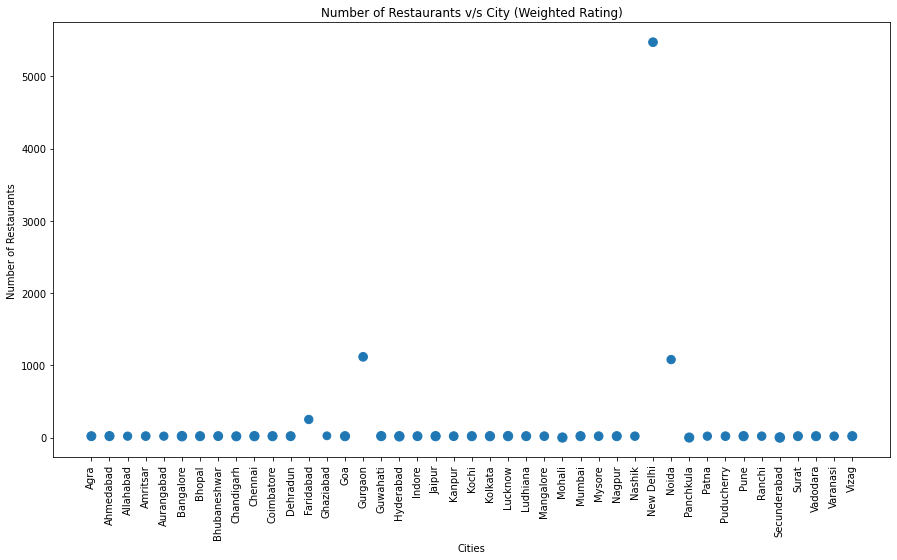

In [21]:
dfc = df.copy()
dfc = dfc[dfc['Country Code'] == 1] 
dfc.dropna(subset = ['Votes', 'Aggregate rating', 'City'], inplace = True)

dfd = pd.DataFrame({'City': dfc.City, 'VotesRating': dfc.Votes*dfc['Aggregate rating'], 'Votes': dfc.Votes, 'Restaurant': dfc['Restaurant Name']})

dfd1=  dfd.groupby('City')['VotesRating'].sum()
dfd2 = dfd.groupby('City')['Votes'].sum()
dfd3 = dfd.groupby("City")['Restaurant'].count()

weightedRating = dfd1/ dfd2

z = weightedRating.values

x = dfd3.index
y = dfd3.values

plt.figure(figsize = [15, 8])
plt.scatter(x, y, s = z*20)
plt.xticks(rotation = 90)
plt.title('Number of Restaurants v/s City (Weighted Rating)')
plt.xlabel('Cities')
plt.ylabel('Number of Restaurants')
plt.show()

#### Inference : 
New Delhi is way ahead of all other cities in terms of restaurants present in a city followed by noida and Gurgaon which have almost the same number of restaurants. Rest all of the other cities have almost the same number of restaurants.